In [31]:
from math import log, factorial, pi
import matplotlib.pyplot as plt

### Approximating x! and (N r)
Mackay p2

In [32]:
def H(x):
    """
    x in (0, 1)
    """
    return x * log((1/x), 2) + (1-x) * log((1/(1-x)), 2)

def log_comb_appox(N, r):
    return N * H(r/N)

def log_comb_appox_plus(N, r):
    return N * H(r/N) - 0.5 * log(2*pi*(N-r)*r/N, 2)

def log_comb(N, r):
    return log(factorial(N)/factorial(r)/factorial(N-r), 2)


In [39]:
# try
N = 100
r = N//3
log_comb(N, r), log_comb_appox(N, r)

(87.92934045377221, 91.49263727797275)

In [85]:
def test_approx(N):
    log_comb_list = []
    log_comb_appox_list = []
    log_comb_appox_plus_list = []
    r_list = []
    for r in range(1, N, max(N//20, 1)):
        r_list.append(r)
        log_comb_list.append(log_comb(N, r))
        log_comb_appox_list.append(log_comb_appox(N, r))
        log_comb_appox_plus_list.append(log_comb_appox_plus(N, r))

    plt.figure(figsize=(5, 5), dpi=300)
    plt.plot(r_list, log_comb_list,"o-", markersize=3, label="comb")
    plt.plot(r_list, log_comb_appox_list, "o-", markersize=3, label="approx")
    plt.plot(r_list, log_comb_appox_plus_list, "o-", markersize=3, label="better approx")
    plt.legend()
    plt.xlabel("r")
    plt.ylabel("log(N r)")
    plt.title(f"N={N}")

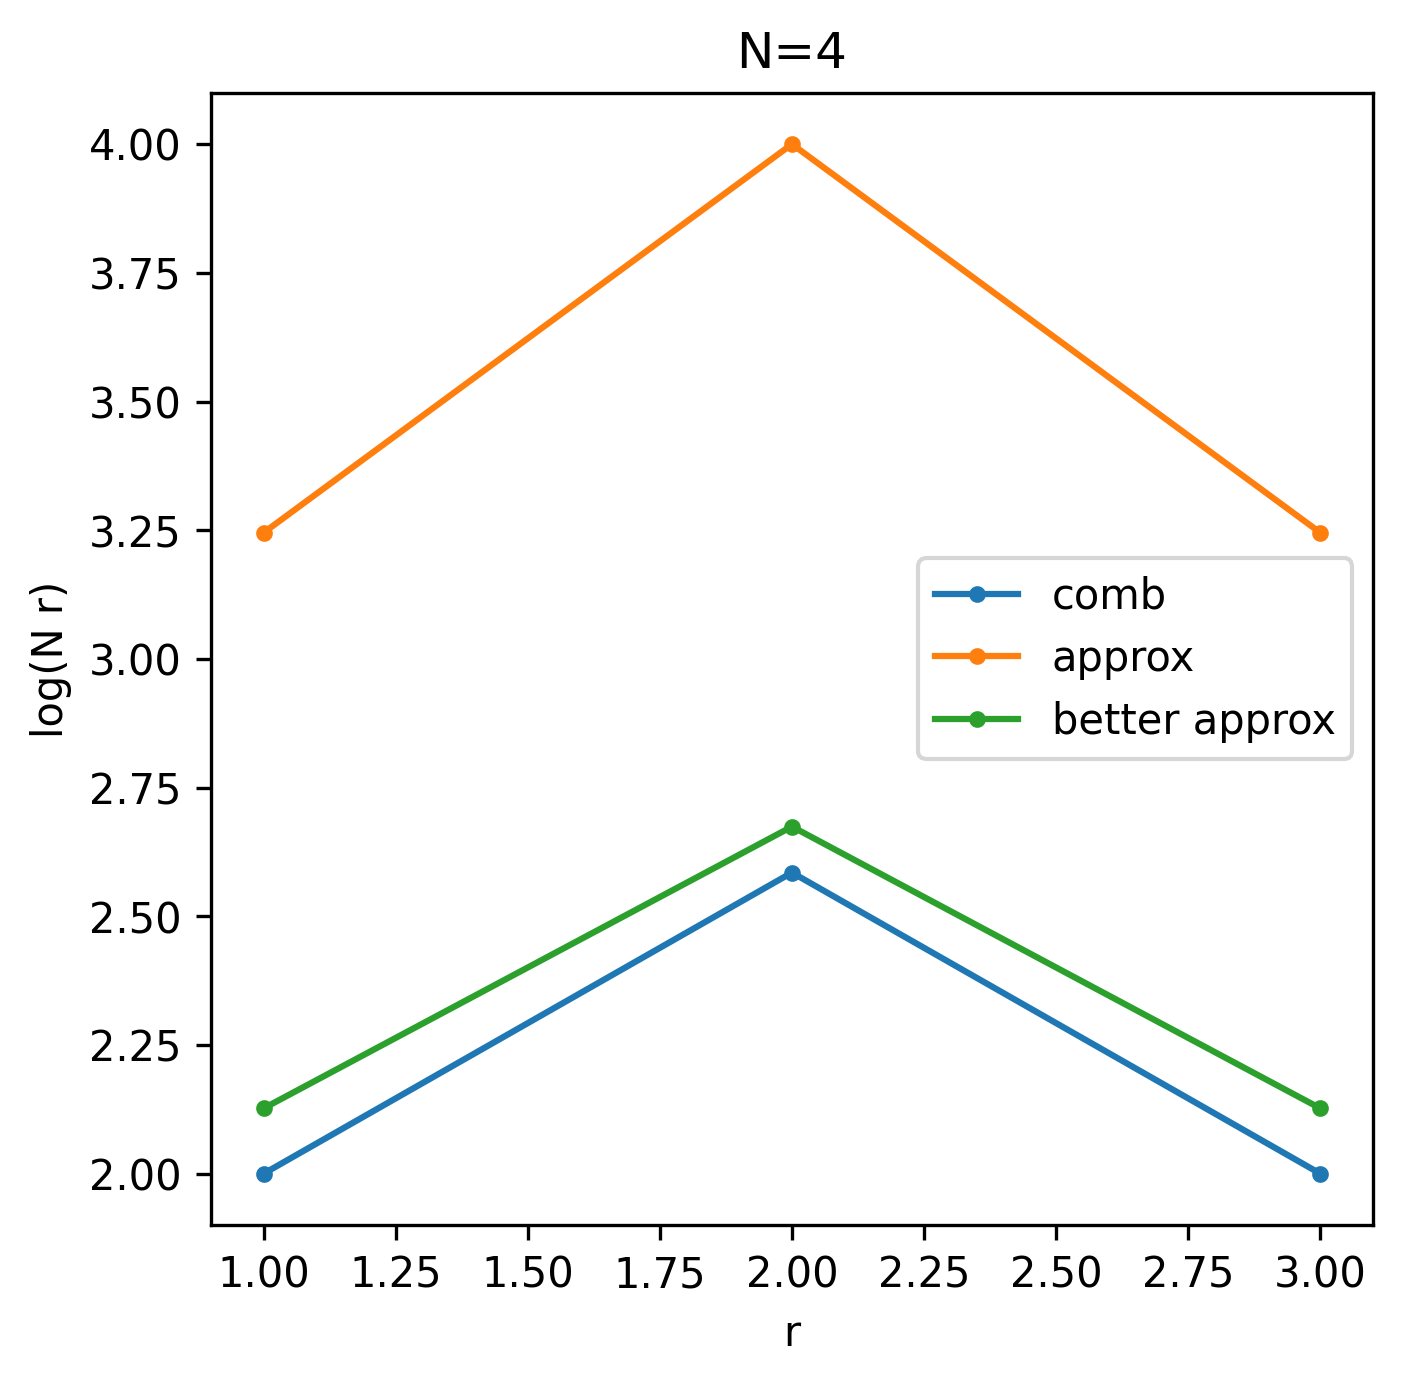

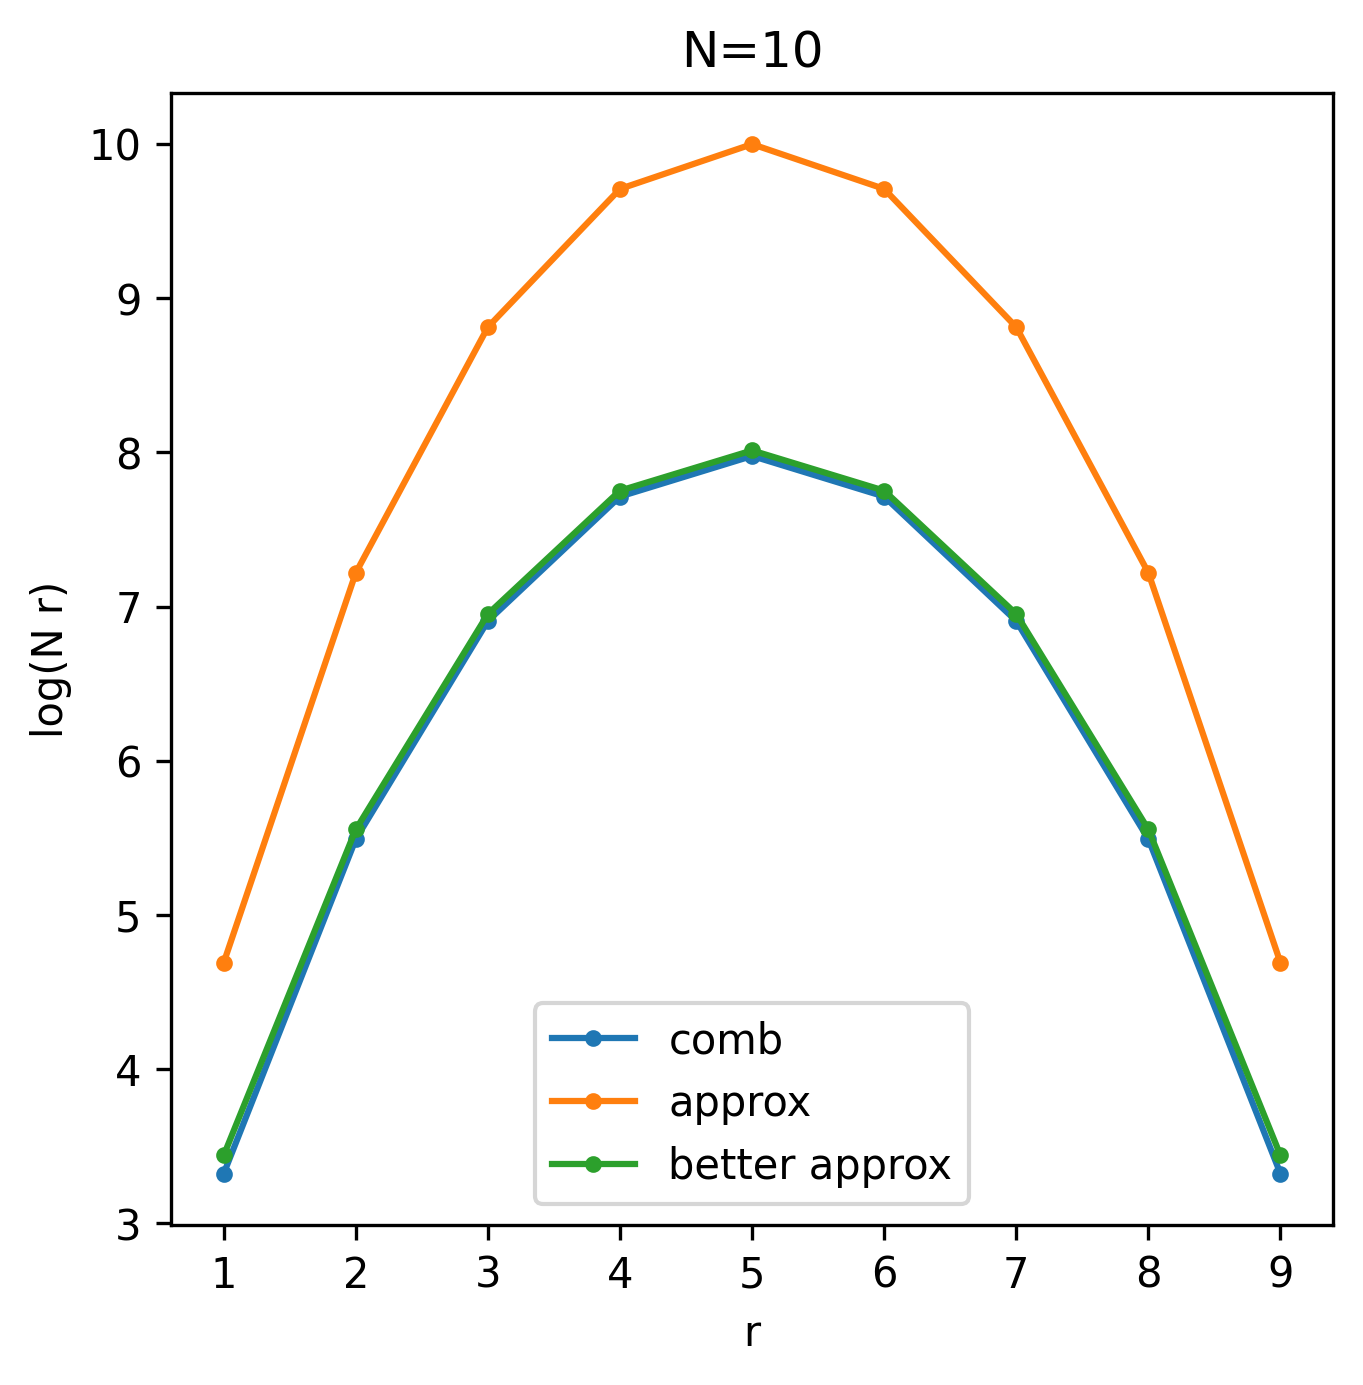

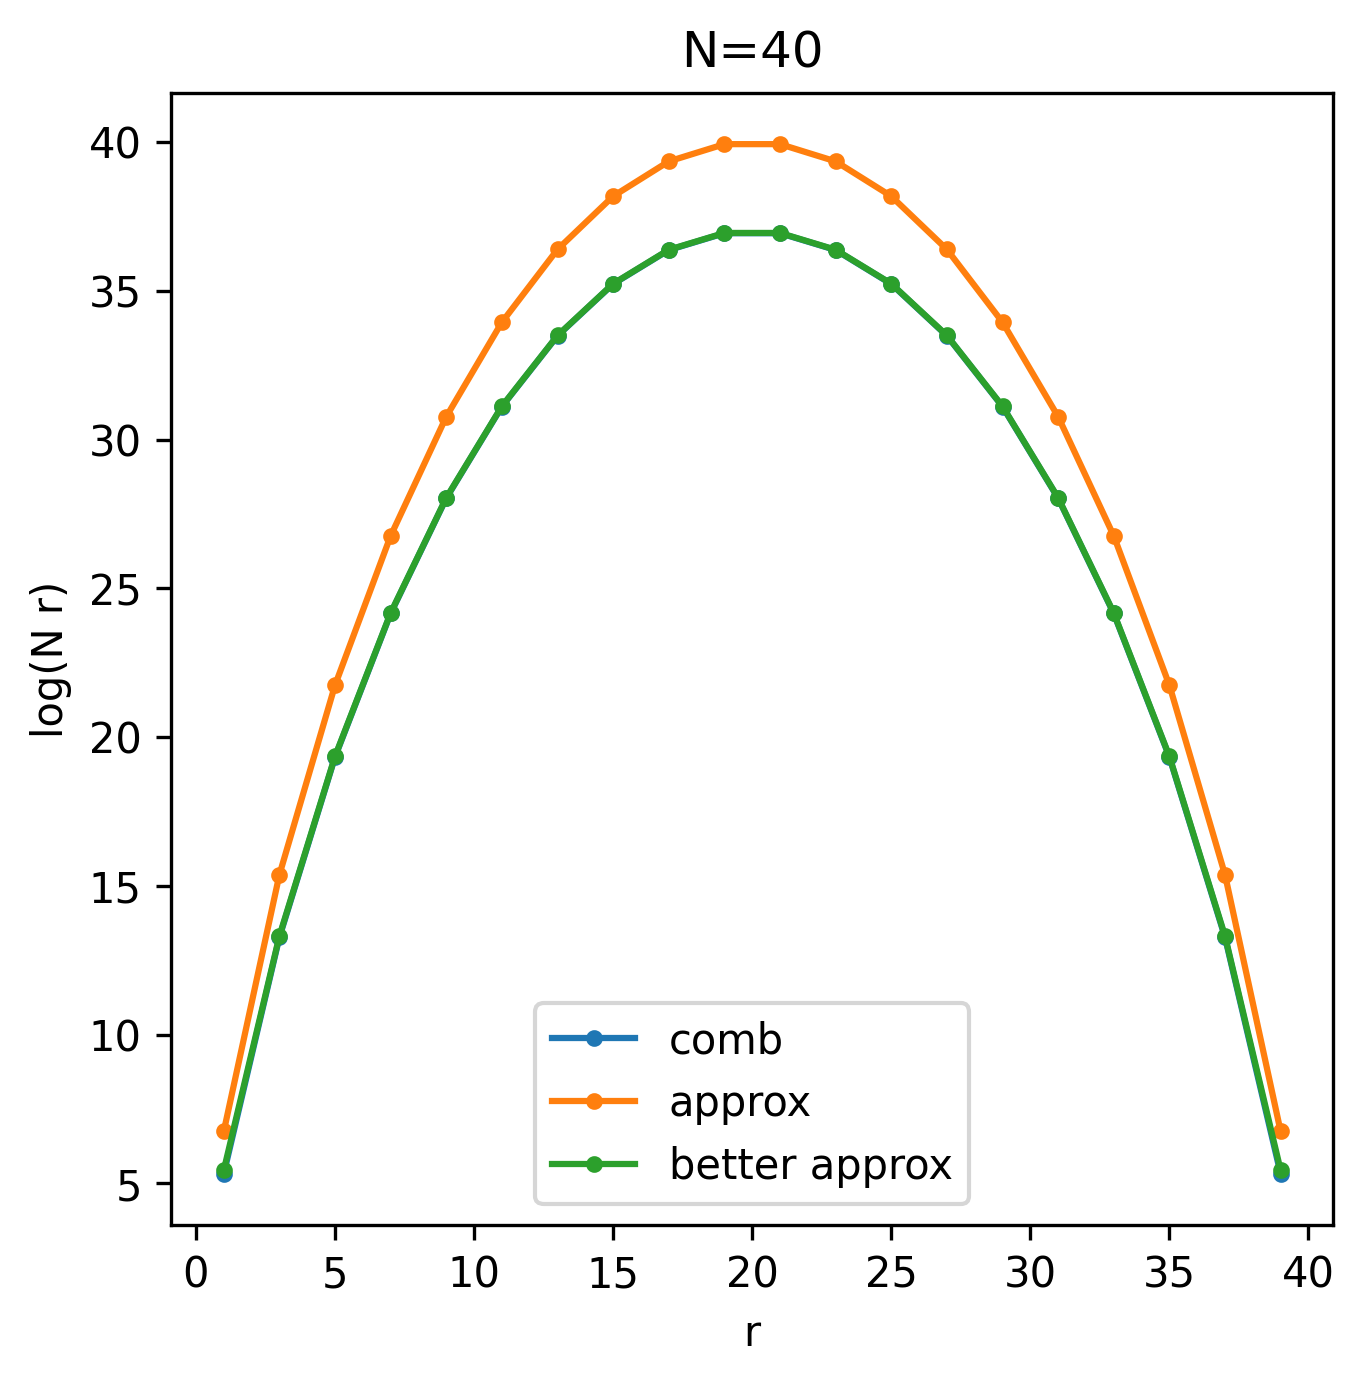

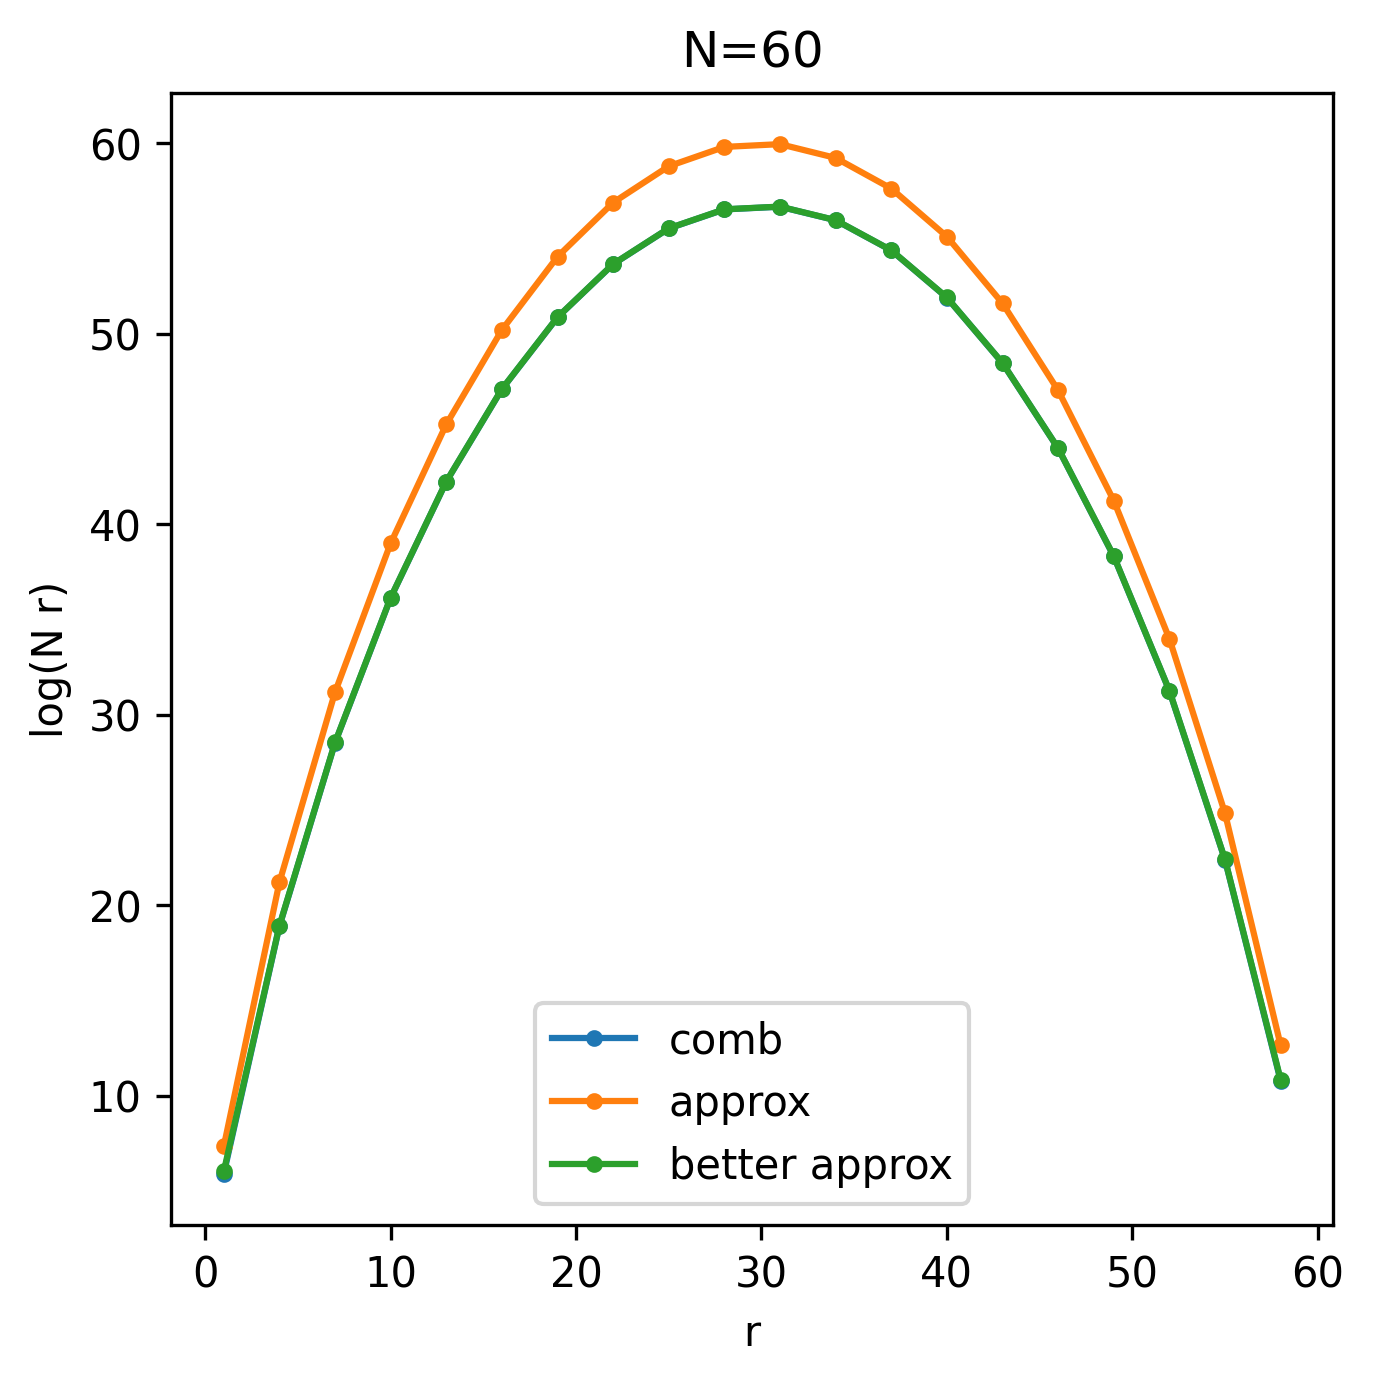

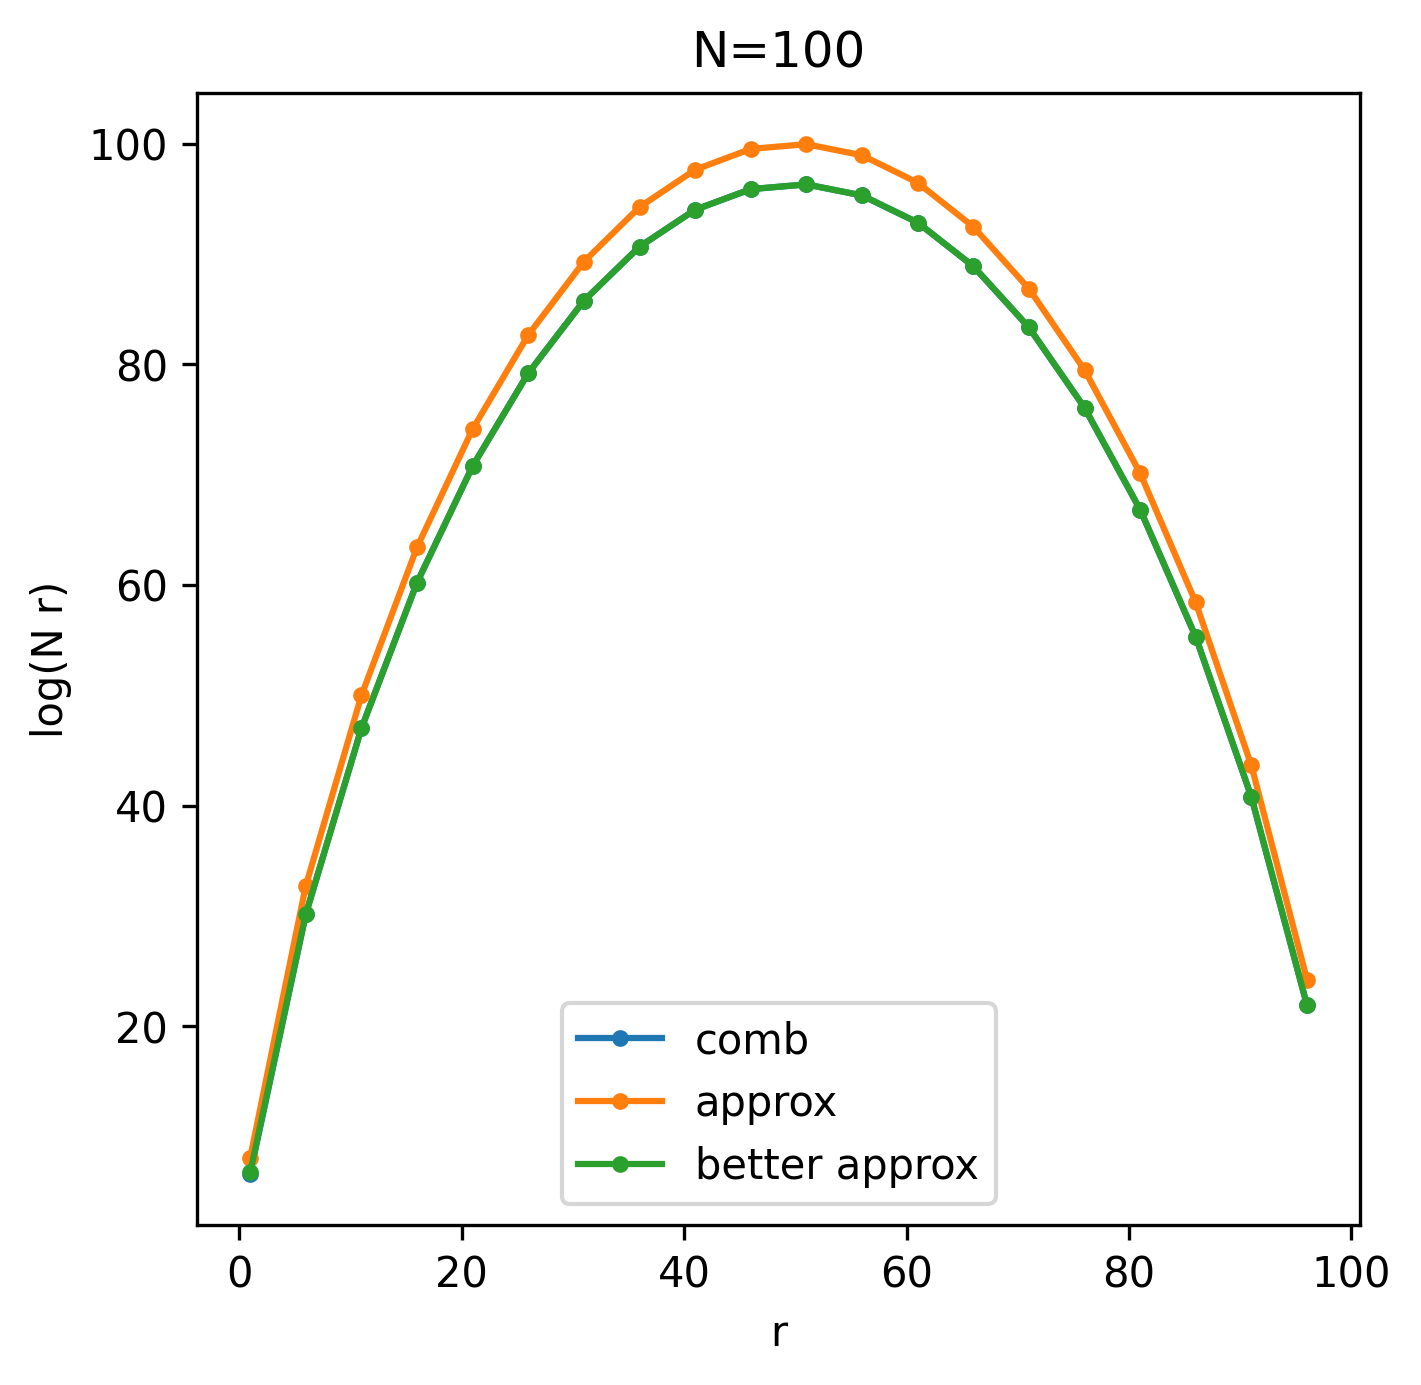

In [86]:
for N in [4, 10, 40, 60, 100]:
    test_approx(N)

### Similar trying
Binomial distribution
$$P(K=k) = {n \choose k} p^k(1-p)^k \approx \frac{1}{\sqrt{2 \pi np(1-p)}}e^{-\frac{(x-np)}{2np(1-p)}}$$
The problem is that lhs is a discrete pmf on k and rhs is a continous pdf on x.  
Possible ways: integral on each side and use the GD to approximate the summation of $P(K=k)$?